In [1]:
import scanpy as sc
import os
import seaborn as sns
import pandas as pd
import numpy as np
import anndata as ad

import bbknn

import muon as mu
from muon import atac as ac
import pyranges as pr

#import scvi
#import torch

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

/home/jool/miniforge3/envs/torch/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jool/miniforge3/envs/torch/lib/python3.13/site-packages/sorted_nearest/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [39]:
data_dir = "/faststorage/project/projectsInBioinformatics/data/PRJNA1177103_aws/SRR31097967_split/SRR31097967/outs/"
data_set = "NOA1"
mdata = mu.read_10x_h5(os.path.join(data_dir, "filtered_peak_bc_matrix.h5"))
atac = mdata.mod['atac']
ac.tl.locate_fragments(atac, fragments=os.path.join(data_dir, "fragments.tsv.gz"))
atac.var['label'] = data_set

/home/jool/miniforge3/envs/torch/lib/python3.13/site-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/jool/miniforge3/envs/torch/lib/python3.13/site-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [40]:
# data_dirs = [
#     ("/faststorage/project/projectsInBioinformatics/data/PRJNA1177103_aws/SRR31097965_split/SRR31097965/outs/", "NOA3"),
#     ("/faststorage/project/projectsInBioinformatics/data/PRJNA1177103_aws/SRR31097966_split/SRR31097966/outs/", "NOA2"),
#     ("/faststorage/project/projectsInBioinformatics/data/PRJNA1177103_aws/SRR31097967_split/SRR31097967/outs/", "NOA1"),
#     ("/faststorage/project/projectsInBioinformatics/data/PRJNA1177103_aws/SRR31097968_split/SRR31097968/outs/", "OA2"),
#     ("/faststorage/project/projectsInBioinformatics/data/PRJNA1177103_aws/SRR31097969_split/SRR31097969/outs/", "OA1")
# ]

# adatas = {}

# #colnames = ['chr', 'start', 'end']
# #peaks = [pd.read_csv(d, sep = '\t', names = colnames, comment = '#') for d, s in data_dirs]
# frags = []

# for datapath, dataset in data_dirs:
#     cur_md = mu.read_10x_h5(os.path.join(datapath, "filtered_peak_bc_matrix.h5"))
#     cur_ad = cur_md.mod['atac']
#     cur_ad.obs_names = [f"{dataset}_{b}" for b in cur_ad.obs_names]
#     frags.append(os.path.join(datapath, "fragments.tsv.gz"))
#     #cur_ad.uns['files'] = {"fragments": os.path.join(datapath, "fragments.tsv.gz")}
#     adatas[dataset] = cur_ad.copy()

# atac = ad.concat(adatas, label = "dataset", join = 'outer')

In [41]:
# fragments_list = [pd.read_csv(f, sep = "\t", header = True, comment="#" for f in frags]
# combined_fragments = pd.concat(fragments_list)

In [42]:
atac

AnnData object with n_obs × n_vars = 11593 × 108177
    var: 'gene_ids', 'feature_types', 'derivation', 'genome', 'label'
    uns: 'files'

In [43]:
#colnames = ['chr', 'start', 'end']
#peaks = [pd.read_csv(os.path.join(d, "peaks.bed"), sep = '\t', names = colnames, comment = '#') for d, s in data_dirs]
#peaks_common = pd.concat(peaks).drop_duplicates().reset_index(drop=True)
#peaks_common

In [44]:
#atac = sc.read("/faststorage/project/projectsInBioinformatics/workspaces/johan/results/atac_combined.h5ad")

In [45]:
# mdata = mu.read_10x_h5(os.path.join(data_dir, "filtered_peak_bc_matrix.h5"))
# mdata.var_names_make_unique()
# mdata

In [46]:
# atac = mdata.mod['atac']
# atac.uns['files'] = {"fragments": os.path.join(data_dir, "fragments.tsv.gz")}

In [47]:
#atac.var['gene_name'] = atac.uns['atac']['peak_annotation'].index.tolist()

In [48]:
# lib_size = atac.X.sum(1)
# atac.obs["size_factor"] = lib_size / np.mean(lib_size)
atac.layers["raw_counts"] = atac.X.copy()

In [49]:
sc.pp.calculate_qc_metrics(atac, percent_top=None, log1p=False, inplace=True)

## Filtering

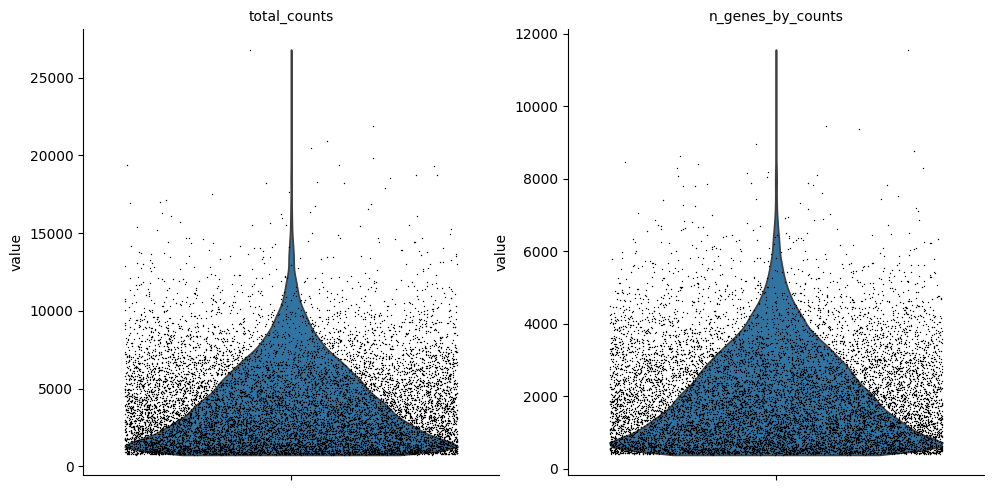

In [50]:
sc.pl.violin(atac, ['total_counts', 'n_genes_by_counts'], jitter=0.4, multi_panel=True)

In [51]:
mu.pp.filter_var(atac, 'n_cells_by_counts', lambda x: x >= 10)
mu.pp.filter_obs(atac, 'n_genes_by_counts', lambda x: (x >= 2000) & (x <= 8000))
mu.pp.filter_obs(atac, 'total_counts', lambda x: (x >= 1000) & (x <= 40000))


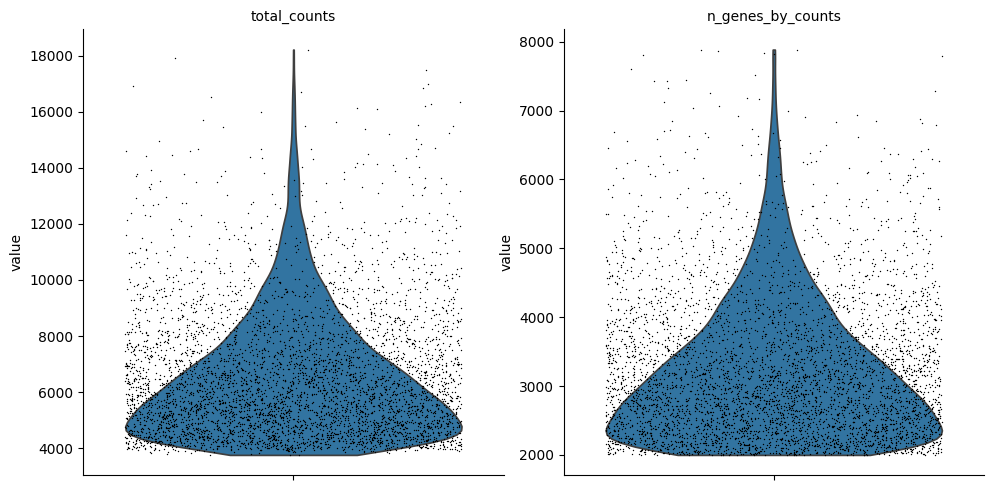

In [52]:
sc.pl.violin(atac, ['total_counts', 'n_genes_by_counts'], jitter=0.4, multi_panel=True)

In [53]:
atac.layers['filtered'] = atac.X.copy()

In [54]:
ac.tl.nucleosome_signal(atac)

Reading Fragments: 100%|█████████████████████████████████████| 47220000/47220000 [03:01<00:00, 259977.90it/s]


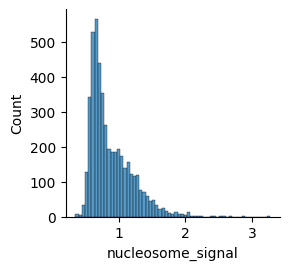

In [55]:
mu.pl.histogram(atac, "nucleosome_signal", kde=False)

Fetching Regions...: 100%|█████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.66s/it]


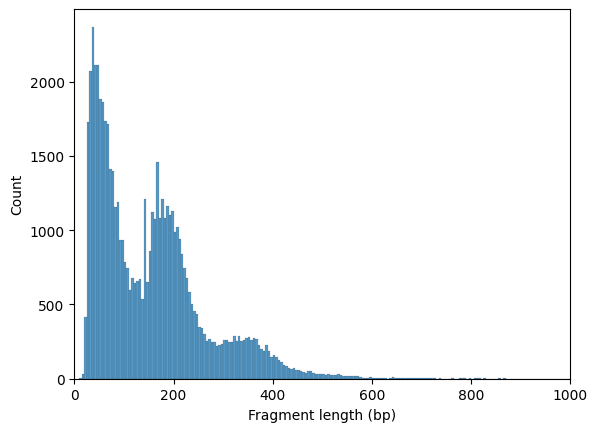

In [56]:
ac.pl.fragment_histogram(atac)

In [16]:
atac.layers["counts"] = atac.X

## Normalisation

In [17]:
atac.X = atac.layers["counts"]
ac.pp.tfidf(atac, scale_factor=1e4)

/home/jool/miniforge3/envs/torch/lib/python3.13/site-packages/muon/_atac/preproc.py:106: RuntimeWarning: divide by zero encountered in divide
  idf = np.asarray(adata.shape[0] / counts.sum(axis=0)).reshape(-1)


In [18]:
#sc.pp.normalize_per_cell(atac, counts_per_cell_after=1e4)
#sc.pp.log1p(atac)

## Feature selection

In [19]:
sc.pp.highly_variable_genes(atac, min_mean=0.5, max_mean=6, min_disp=.5)

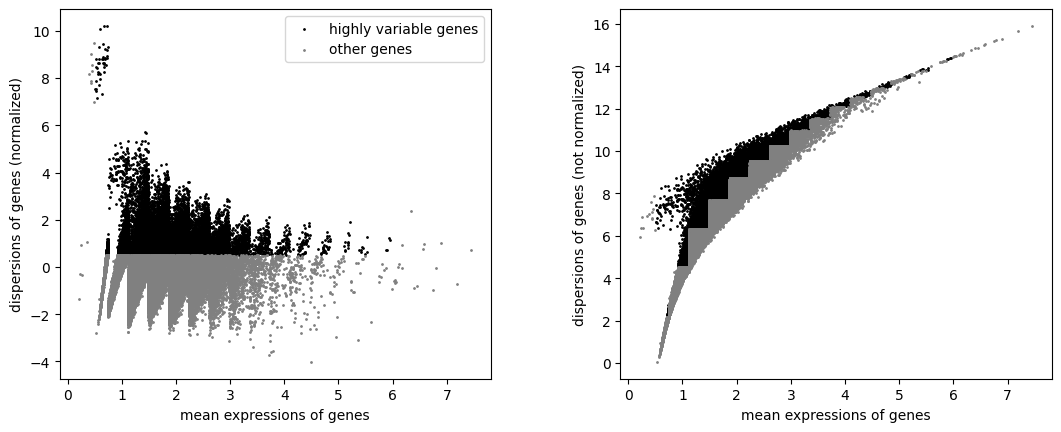

In [20]:
sc.pl.highly_variable_genes(atac)

In [21]:
np.sum(atac.var.highly_variable)

np.int64(32793)

In [22]:
atac.layers["tfidf"] = atac.X

In [23]:
ac.tl.lsi(atac)

In [24]:
# Removing first component per recommendation as it is usually associated with cell count and/or number of peaks
atac.obsm['X_lsi'] = atac.obsm['X_lsi'][:,1:]
atac.varm["LSI"] = atac.varm["LSI"][:,1:]
atac.uns["lsi"]["stdev"] = atac.uns["lsi"]["stdev"][1:]

In [25]:
sc.pp.neighbors(atac, use_rep="X_lsi", n_neighbors=10, n_pcs=30)

In [26]:
ac.tl.add_peak_annotation(atac, annotation=os.path.join(data_dir, "peak_annotation.tsv"))

/home/jool/miniforge3/envs/torch/lib/python3.13/site-packages/muon/_atac/tools.py:118: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  pa.loc[pa.distance.isnull(), "distance"] = ""


In [27]:
atac.uns['atac']['peak_annotation'].head()

peak  distance peak_type
gene                                                   
DDX11L2             chr1:9791-10674     -1195    distal
ENSG00000241860  chr1:180863-181747     -7002    distal
ENSG00000241860  chr1:191063-191966    -17202    distal
ENSG00000235146  chr1:629513-630394     41885    distal
ENSG00000235146  chr1:633629-634442     46001    distal

In [28]:
atac

AnnData object with n_obs × n_vars = 4722 × 107928
    obs: 'size_factor', 'n_genes_by_counts', 'total_counts', 'NS', 'nucleosome_signal'
    var: 'gene_ids', 'feature_types', 'derivation', 'genome', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'files', 'hvg', 'lsi', 'neighbors', 'atac'
    obsm: 'X_lsi'
    varm: 'LSI'
    layers: 'raw_counts', 'filtered', 'counts', 'tfidf'
    obsp: 'distances', 'connectivities'

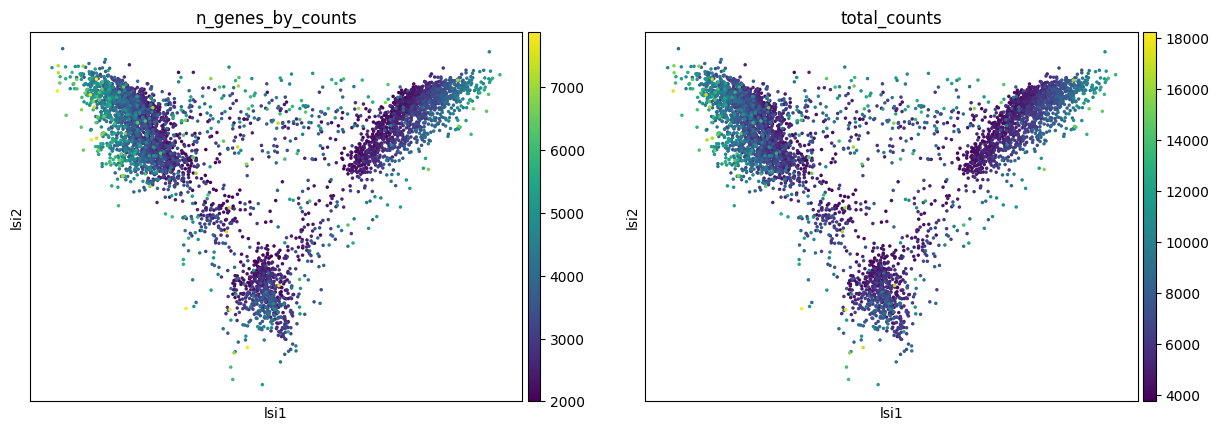

In [29]:
sc.pl.embedding(atac, basis = 'lsi', color=["n_genes_by_counts", "total_counts"])

In [30]:
#"VIM" in atac.uns['atac']['peak_annotation'].index
atac.X = atac.layers["tfidf"]

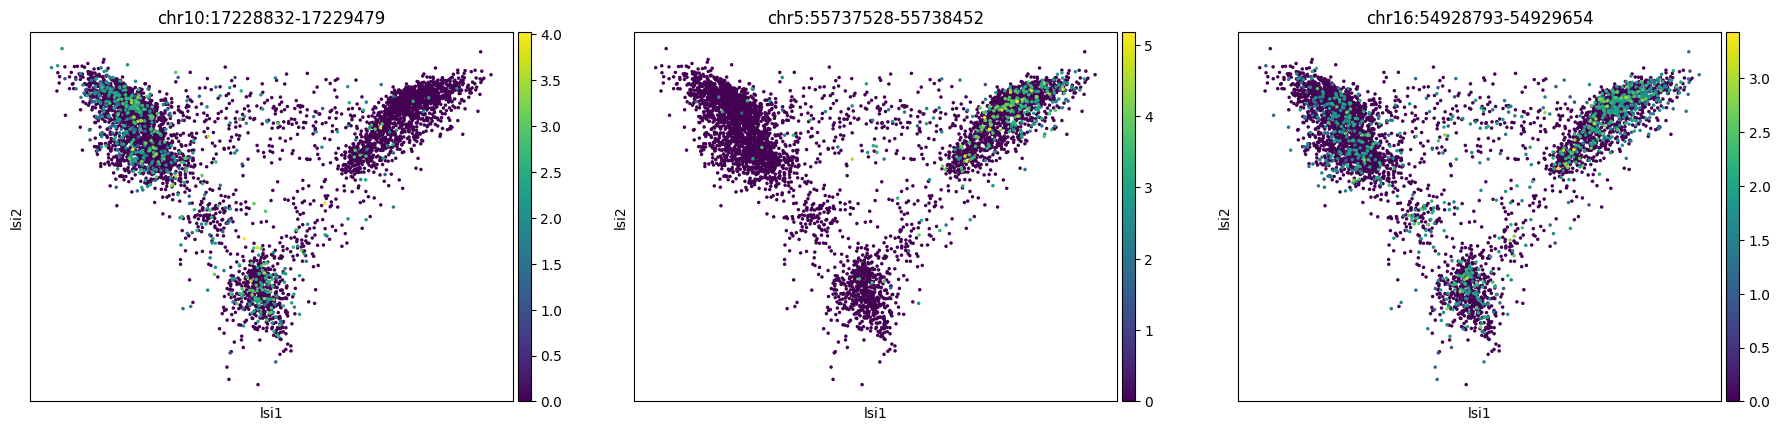

In [31]:
mu.atac.pl.lsi(atac, color = ['chr10:17228832-17229479', 'chr5:55737528-55738452', 'chr16:54928793-54929654'], average = 'total', use_raw = False)  # Cannot find the genes
# VIM: ENSG00000026025, chr10-17228832-17229479
# DDX4: ENSG00000152670, chr5:55737528-55738452
# CRNDE: ENSG00000245694, chr16:54848006-54848797, chr16:54928793-54929654

## Clustering

In [32]:
sc.tl.leiden(atac, resolution=.5)

/tmp/10341642/ipykernel_1060554/937485634.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(atac, resolution=.5)


In [33]:
sc.tl.umap(atac, spread=1.5, min_dist=.5, random_state=20)

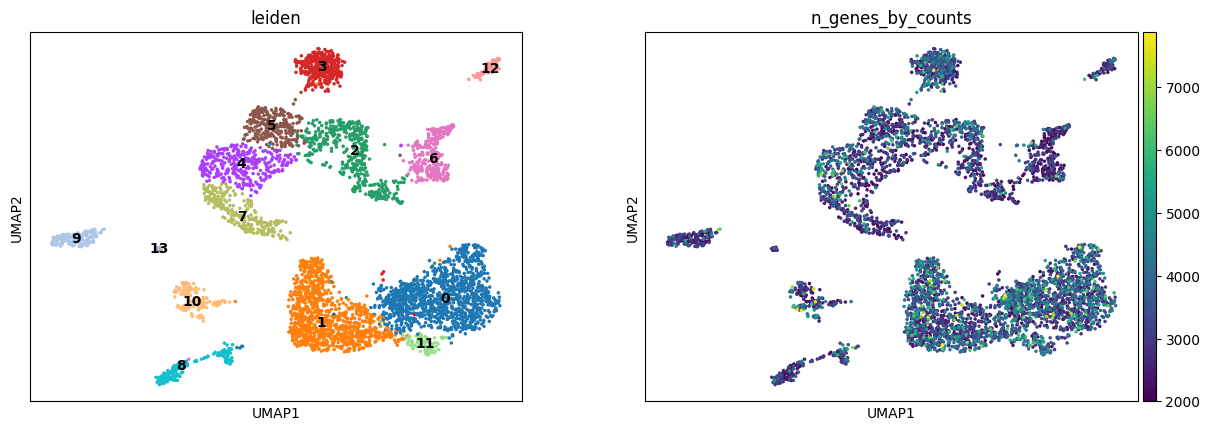

In [34]:
sc.pl.umap(atac, color=["leiden", "n_genes_by_counts"], legend_loc="on data")

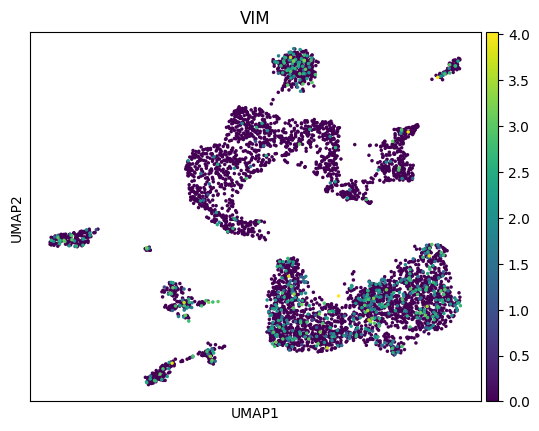

In [35]:
ac.pl.umap(atac, color = ["chr10:17228832-17229479"], average = "total", use_raw = False, title = "VIM")

In [36]:
ac.tl.rank_peaks_groups(atac, 'leiden', method='t-test')
result = atac.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.set_option("display.max_columns", 10)
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'genes', 'pvals']}).head(10)

0_n                         0_g           0_p  \
0  chr2:224072401-224073333                    SERPINE2  7.873058e-58   
1   chr16:78505497-78506440       ENSG00000260733, WWOX  4.214415e-46   
2    chr1:55380151-55381054             ENSG00000234810  3.975652e-44   
3  chr2:238938342-238939372                   LINC01940  5.539644e-44   
4    chr1:59178274-59179189          LINC01358, FGGY-DT  3.103993e-43   
5    chr5:34496890-34497810                    RAI14-DT  5.592774e-42   
6    chr9:96232406-96233347                 HSD17B3-AS1  2.175779e-40   
7  chr1:197367033-197367923                        CRB1  8.205213e-40   
8    chr2:19037816-19038731  ENSG00000287284, LINC01376  1.005358e-39   
9   chr14:74974983-74975865                         PGF  3.773660e-39   

                        1_n                    1_g  ...  \
0   chr20:37911689-37912605                 VSTM2L  ...   
1    chr1:39625195-39626101  ENSG00000225903, HEYL  ...   
2    chr7:73893236-73894145                TMEM270  ...   
3    chr8:98402408-98403308                  KCNS2  ...   
4   chr20:23180156-23181052        ENSG00000230387  ...   
5    chr3:58165089-58166000         FLNB, FLNB-AS1  ...   
6   chr16:85321659-85322544        ENSG00000287946  ...   
7    chr7:55177468-55178404         EGFR-AS1, EGFR  ...   
8  chr9:107251587-107252506                 RAD23B  ...   
9  chr9:121325914-121326830                    GSN  ...   

                                      12_g          12_p  \
0               ENSG00000230552, LINC01117  2.527664e-08   
1                                LINC01257  4.012604e-08   
2                          ENSG00000237271  1.059234e-07   
3                                   PLA2G6  1.452144e-07   
4  EPHB1, ENSG00000286982, ENSG00000288700  1.679817e-07   
5                                     TNS1  1.976305e-07   
6                          ENSG00000232328  3.722655e-07   
7                                      LOX  3.789131e-07   
8              IGFBP7-AS1, ENSG00000287369  7.773505e-07   
9                          ENSG00000286806  8.173949e-07   

                       13_n                   13_g      13_p  
0    chr6:24666498-24667388           ACOT13, TDP2  0.000413  
1   chr17:17591271-17592166  PEMT, ENSG00000264666  0.000574  
2   chr20:50730772-50731686                 PARD6B  0.001486  
3    chr1:53325876-53326801                   LRP8  0.001500  
4   chr12:51368661-51369549                 GALNT6  0.001873  
5  chr2:189783922-189784800           ORMDL1, PMS1  0.002086  
6   chr19:49766237-49767144                  AP2A1  0.002097  
7    chr4:77075788-77076591  ENSG00000289496, CCNI  0.002129  
8   chr11:67805290-67806103               FAM86C2P  0.002933  
9   chr19:42242474-42243315                  GSK3A  0.003205  

[10 rows x 42 columns]

In [37]:
#atac.uns["rank_genes_groups"]["names"] = atac.uns["rank_genes_groups"]["genes"]

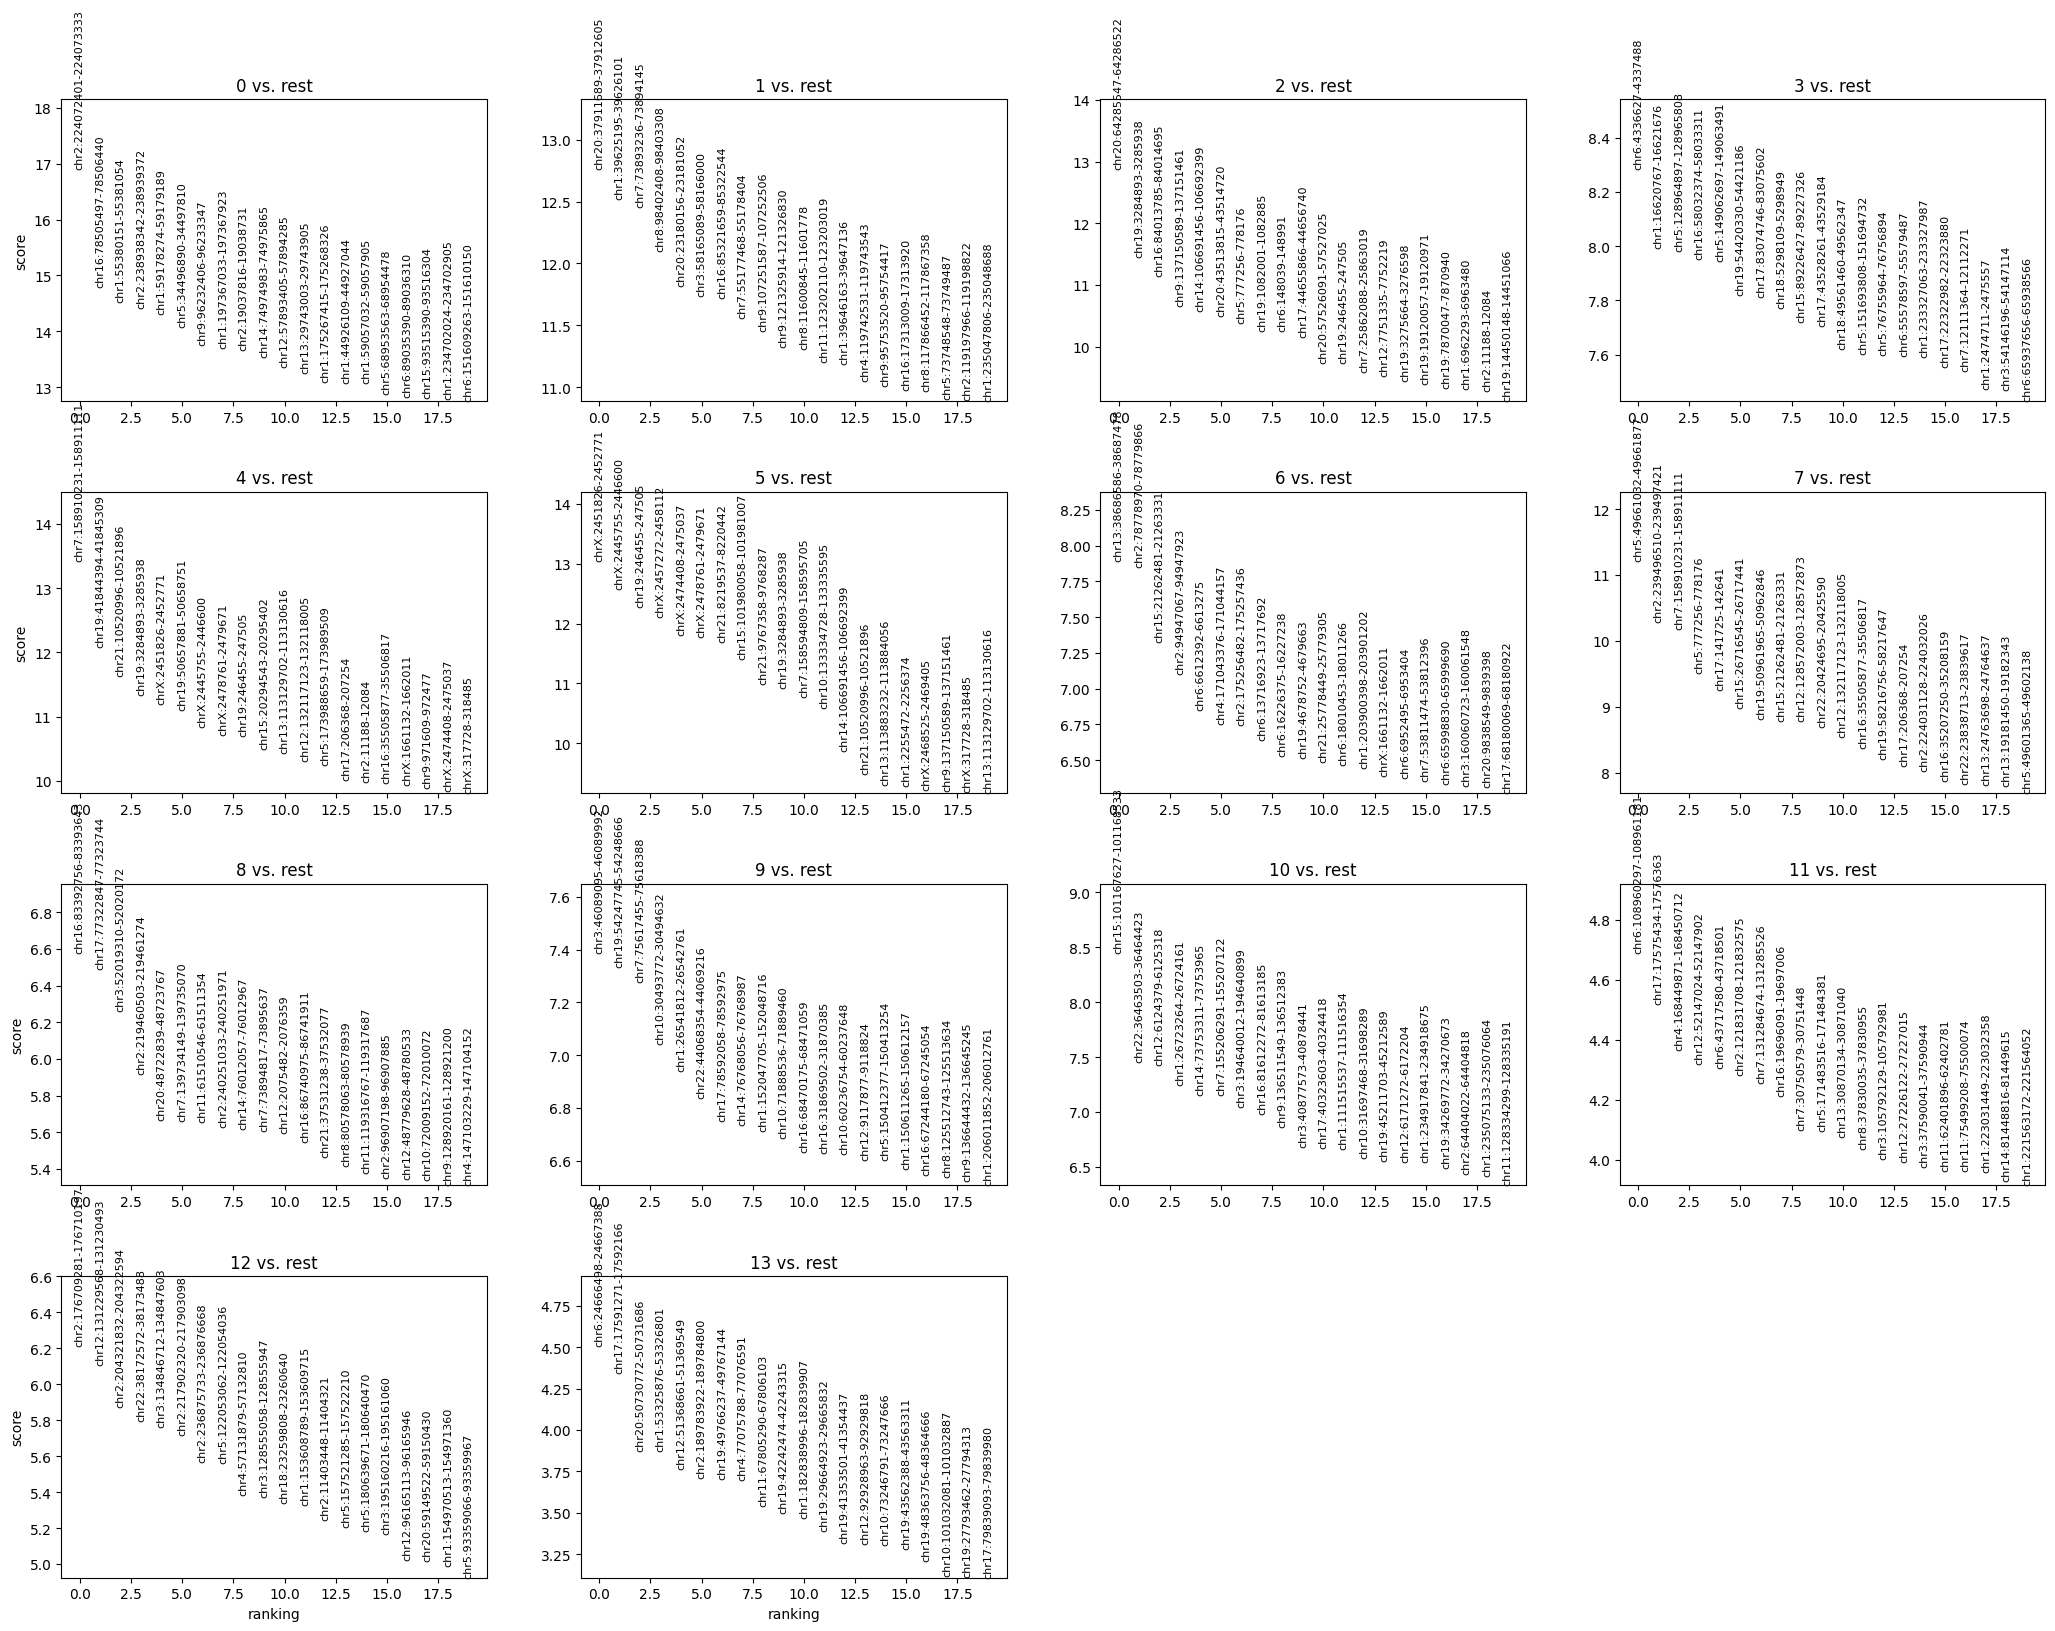

In [38]:
sc.pl.rank_genes_groups(atac, n_genes=20, sharey=False) #Empty spaces shows peaks not in genes

## Gene activity

In [39]:
gtf = pr.read_gtf("/faststorage/project/projectsInBioinformatics/data/refdata-cellranger-arc-GRCh38-2024-A/genes/genes.gtf.gz")
genes = gtf[gtf.Feature == "gene"]
features = genes.as_df()[["Chromosome", "Start", "End", "gene_name"]]
features.columns = ["chrom", "start", "end", "gene_name"]
features = features[features["chrom"] != "chrM"]
features = features.set_index("gene_name")
features

chrom     start       end
gene_name                                      
ENSG00000278704  GL000009.2     56139     58376
ENSG00000277400  GL000194.1     53589    115018
MAFIP            GL000194.1     53593    115055
ENSG00000276256  GL000195.1     42938     49164
ENSG00000277630  GL000213.1    108006    139659
...                     ...       ...       ...
DAZ3                   chrY  24763068  24813492
BPY2C                  chrY  25030900  25062548
TTTY4C                 chrY  25063082  25099892
TTTY17C                chrY  25182276  25213389
SEPTIN14P23            chrY  25378299  25394719

[38593 rows x 3 columns]

In [40]:
# peak_annotation = atac.uns['atac']['peak_annotation']

# peak_to_gene = peak_annotation.set_index("peak").index.to_series()
# peak_to_gene = peak_annotation.index.to_series().set_axis(peak_annotation["peak"])

# features = atac.var.index.to_series().str.split("[:-]", expand = True)
# features.columns = ["chrom", "start", "end"]
# features["start"] = features["start"].astype("int")
# features["end"] = features["end"].astype("int")

# # reset index so 'peak' is a column
# features_reset = features.reset_index().rename(columns={"index": "peak"})

# # merge with annotation
# merged = features_reset.merge(
#     peak_annotation.reset_index(),  # bring gene_name out of index
#     on="peak"
# )

# features = merged.set_index("gene")
# features = features[features.peak_type == "promoter"]
# features[features.distance.abs() < 2000]

In [41]:
atac_ga = ac.tl.count_fragments_features(atac, features = features)

/tmp/9381900/ipykernel_431631/3241082652.py:1: FutureWarning: From v0.2, by default, unique fragments will be counted instead of reads. See muon#110 for details.
  atac_ga = ac.tl.count_fragments_features(atac, features = features)
100%|█████████████████████████████████████| 38593/38593 [10:26<00:00, 61.62it/s]
/home/jool/miniforge3/envs/torch/lib/python3.13/site-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [42]:
atac_ga.var_names_make_unique()

In [43]:
atac_ga

AnnData object with n_obs × n_vars = 4722 × 38593
    obs: 'size_factor', 'n_genes_by_counts', 'total_counts', 'NS', 'nucleosome_signal', 'leiden'
    var: 'chrom', 'start', 'end'

Using the gene activity matrix as an approximation of gene expression to integrate with scRNA-seq as the data is unpaired.

In [44]:
atac_ga.layers['standard'] = atac_ga.X

In [45]:
sc.pp.normalize_total(atac_ga, target_sum = 1e4)
sc.pp.log1p(atac_ga)

In [46]:
sc.pp.highly_variable_genes(atac_ga, min_mean = 0.02, max_mean = 4, min_disp = 0.5)

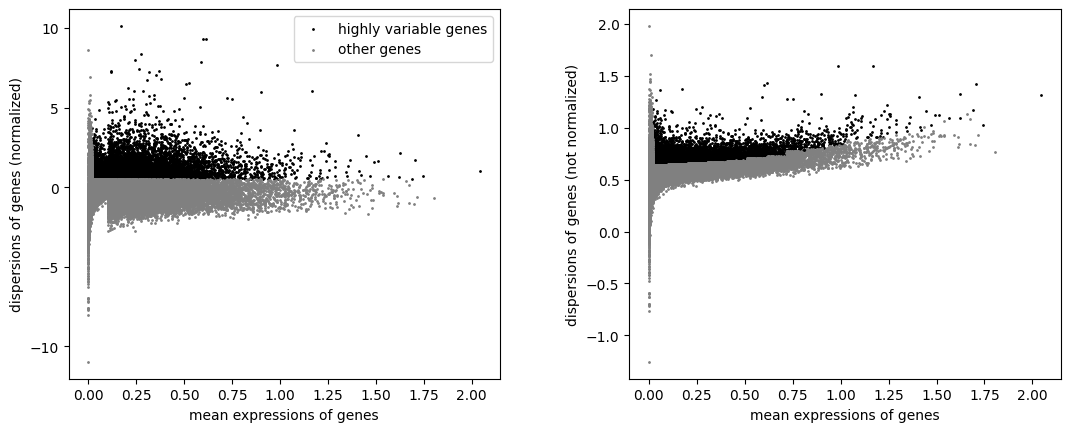

In [47]:
sc.pl.highly_variable_genes(atac_ga)

In [48]:
sc.pp.neighbors(atac_ga, n_neighbors = 10, n_pcs = 25)

/home/jool/miniforge3/envs/torch/lib/python3.13/site-packages/scanpy/neighbors/__init__.py:586: UserWarning: You’re trying to run this on 38593 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  X = _choose_representation(self._adata, use_rep=use_rep, n_pcs=n_pcs)


In [49]:
sc.tl.leiden(atac_ga, resolution = 1.2)

In [50]:
sc.tl.umap(atac_ga, spread = 1.5, min_dist = 0.2, random_state = 1)

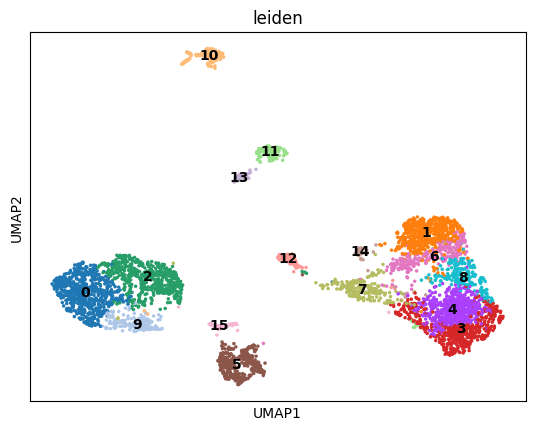

In [51]:
sc.pl.umap(atac_ga, color = 'leiden', legend_loc = 'on data')

In [52]:
sc.tl.rank_genes_groups(atac_ga, 'leiden', method = 't-test')

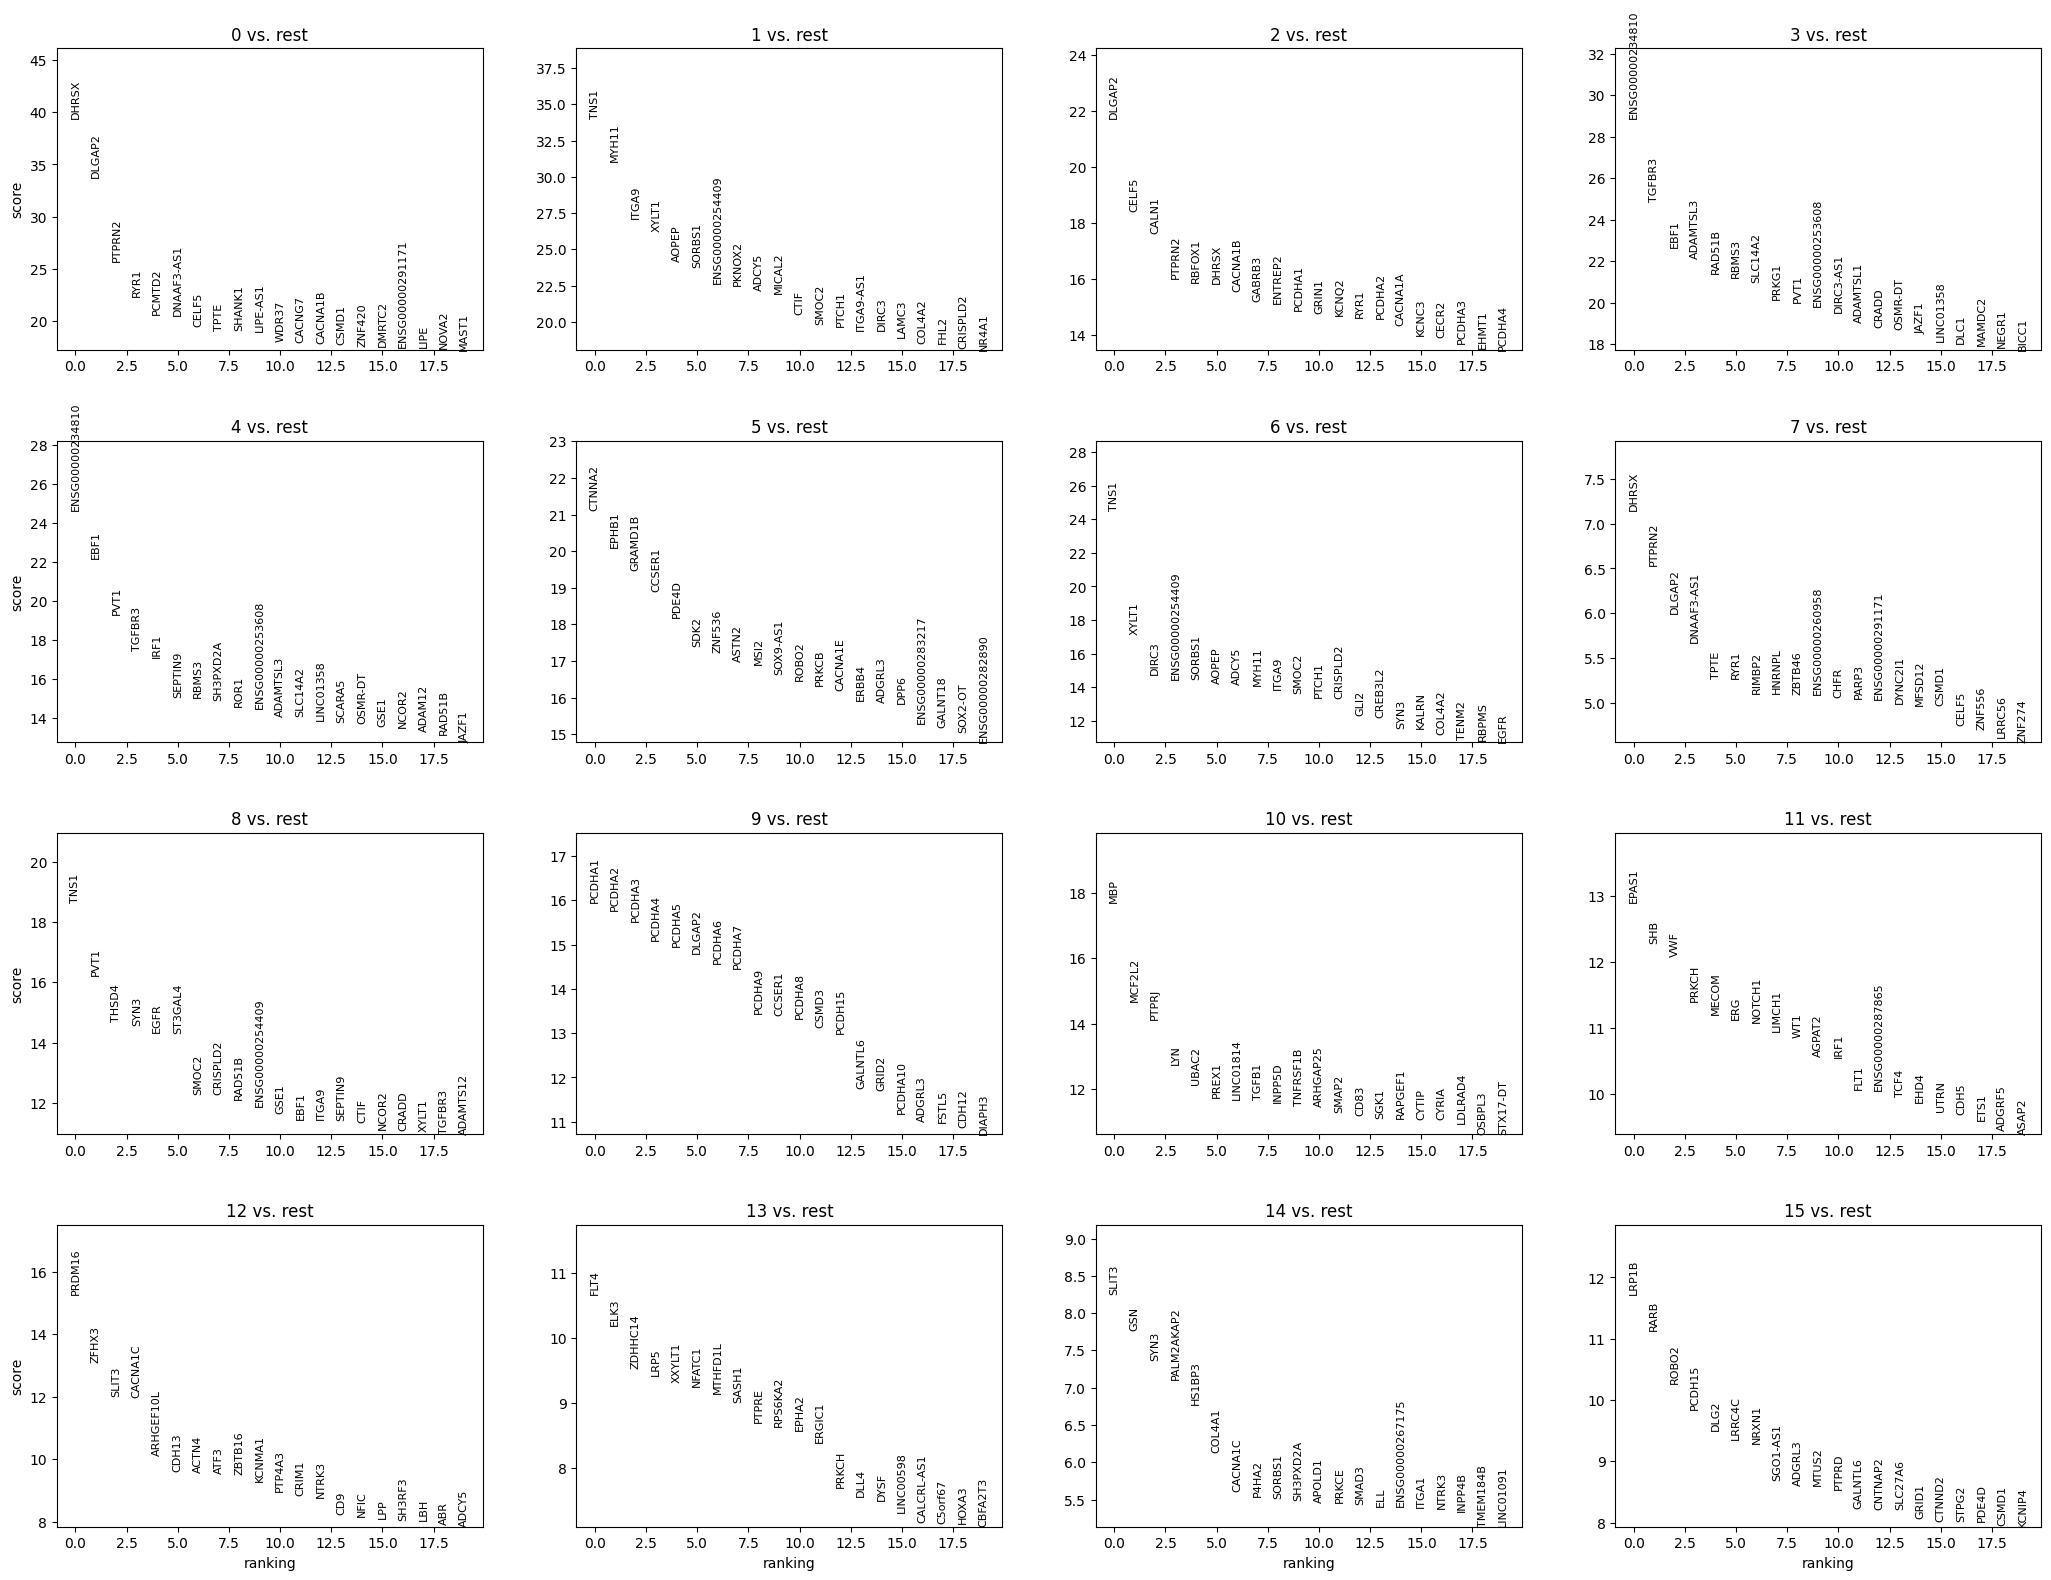

In [53]:
sc.pl.rank_genes_groups(atac_ga, n_genes = 20, sharey = False)

In [89]:
def marker_score(markers_dict, adata, N_samples=100, random_seed=42): #Taken from NGS 2025 course pythonScript.py
    np.random.seed(random_seed)
    markers_list = []
    N_genes = adata.shape[1]
    random_genes = np.unique( np.random.randint(low=0, high=N_genes, size=N_samples) )
    gene_names = adata.var_names[random_genes]
    for i in markers_dict:
        markers_list.append(f'{i}_score')
        adata.obs[f'{i}_score'] = np.array(np.mean(adata[:,markers_dict[i]].X,1) - np.mean(adata[:,gene_names].X,(0,1)))
    return markers_list, adata

marker_genes = {
    #Overview
    "Sertoli": ["SOX9","GATA1","ACSL4","WT1","GAS6","VIM","CD99", "APOA1"],
    "Leydig": ["CFD","IGF1","IGFBP5","INSL3"], 
    "Myoid": ["MYH11", "ACTA2"],
    "Macrophage": ["CD68", "CD163", "MSR1", "CD14"], 
    "Endothelial": ["VWF", "SOX17"],
    "B": ["CD52"],
    "Mast": ["TPSB2"],
    "T": ["CCL5"],
    "Plasma": ["IGLC2"],
    "PMC": ["DPEP1"],
    "Schwann": ["S100B"],
    "Smooth muscle": ["TAGLN"],
    "Germ": ["CRNDE"],

    #Germline specific stages, SPG: Spermatogonia, SC: Spermatocytes, SD: Spermatid.
    "SSC1.SPG": ["ID4", "UTF1", "TWIST1", "KRT18", "TLE5", "ENHO", "C19orf84", "SIX1", "PIWIL4"], #AES == TLE5
    "SSC2.SPG":["ASB9", "L1TD1", "NANOS3", "FAM25G", "CITED2"],
    "Diffing.SPG": ["MKI67", "ACTL8", "KLHL15", "DMRT1", "PABPC4"],
    "Diffed.SPG": ["SSX3", "TEX19", "PNMA6E", "PEG10", "TKTL1", "BEND2"],
    "PreLeptotene.SC": ["DPH7", "PRDM9", "PRAP1", "KIF1A", "MAGEA9B", "FAM9C", "ATP6AP1", "OTUD6A", "CCNB3"], 
    "Leptotene.Zygotene.SC": ["LINC00668", "LINC01120", "MLN", "LINC00865", "C18orf63"], #AL138889.1 == MLN, "AP000350.6", 
    "Pachytene.SC": ["PCDHB6", "POM121L12", "POM121L2", "C9orf57", "PCDHB5", "PCDHB2", "MNS1", "CCDC42"], #Can't find AL133279.3, AC093326.2, AL353581.1, AC135012.2 in ensebml database
    "Diplotene.SC": ["ART5", "KLB", "B3GALT4", "ELMO3", "RTN4RL2", "LINC00588", "WNT6", "LINC01309", "KRT72", "LDHC"], #Can't find AC073263.2, AL121936.1 in ensembl
    "Early.Round.SD": ["FAM24A","SPACA1","BRINP3-DT","ABRA","LINC00703","LINC02502","PPP1R27","H1-0","TPRG1","LRRC39","C1orf87","TMIGD3"], #LINC01351 == BRINP3-DT, H1F0 == H1-0
    "Round.SD": ["TNP2","LINC02314","LINC01921","PRSS37","FBXO39","LINC02400","DHRS3","FAM205C","CXorf65","SCP2D1","LINC01548","CCDC179","SPEM3"], #AC113189.2 -> SPEM3, Can't find AC010255.3 in ensembl
    "Elongated.SD": ["TSSK6","CABS1","SPATA3","CCDC196","TSPAN16","PHOSPHO1","SPEM2","TEX44","LRRD1","SPEM1","GLUL"] #FLJ40194
}

In [46]:
#atac_ga = sc.read_h5ad("../../results/NOA1_atac_ga.h5ad")
#rna = sc.read_h5ad("../../results/celltype_annotation_scRNA.h5ad")

/home/jool/miniforge3/envs/torch/lib/python3.13/site-packages/anndata/_core/anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [90]:
marker_scores, atac_ga = marker_score(marker_genes, atac_ga)

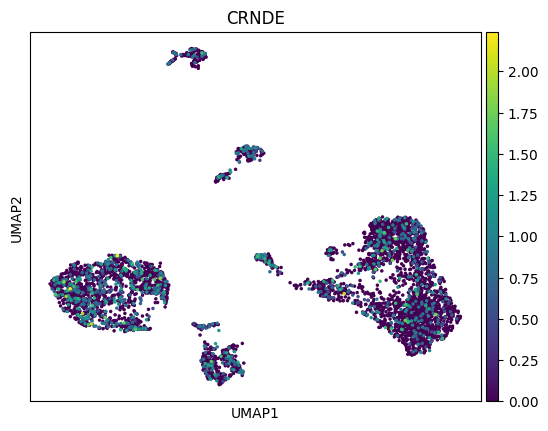

In [102]:
sc.pl.umap(atac_ga, color = 'CRNDE', legend_loc = 'on data')

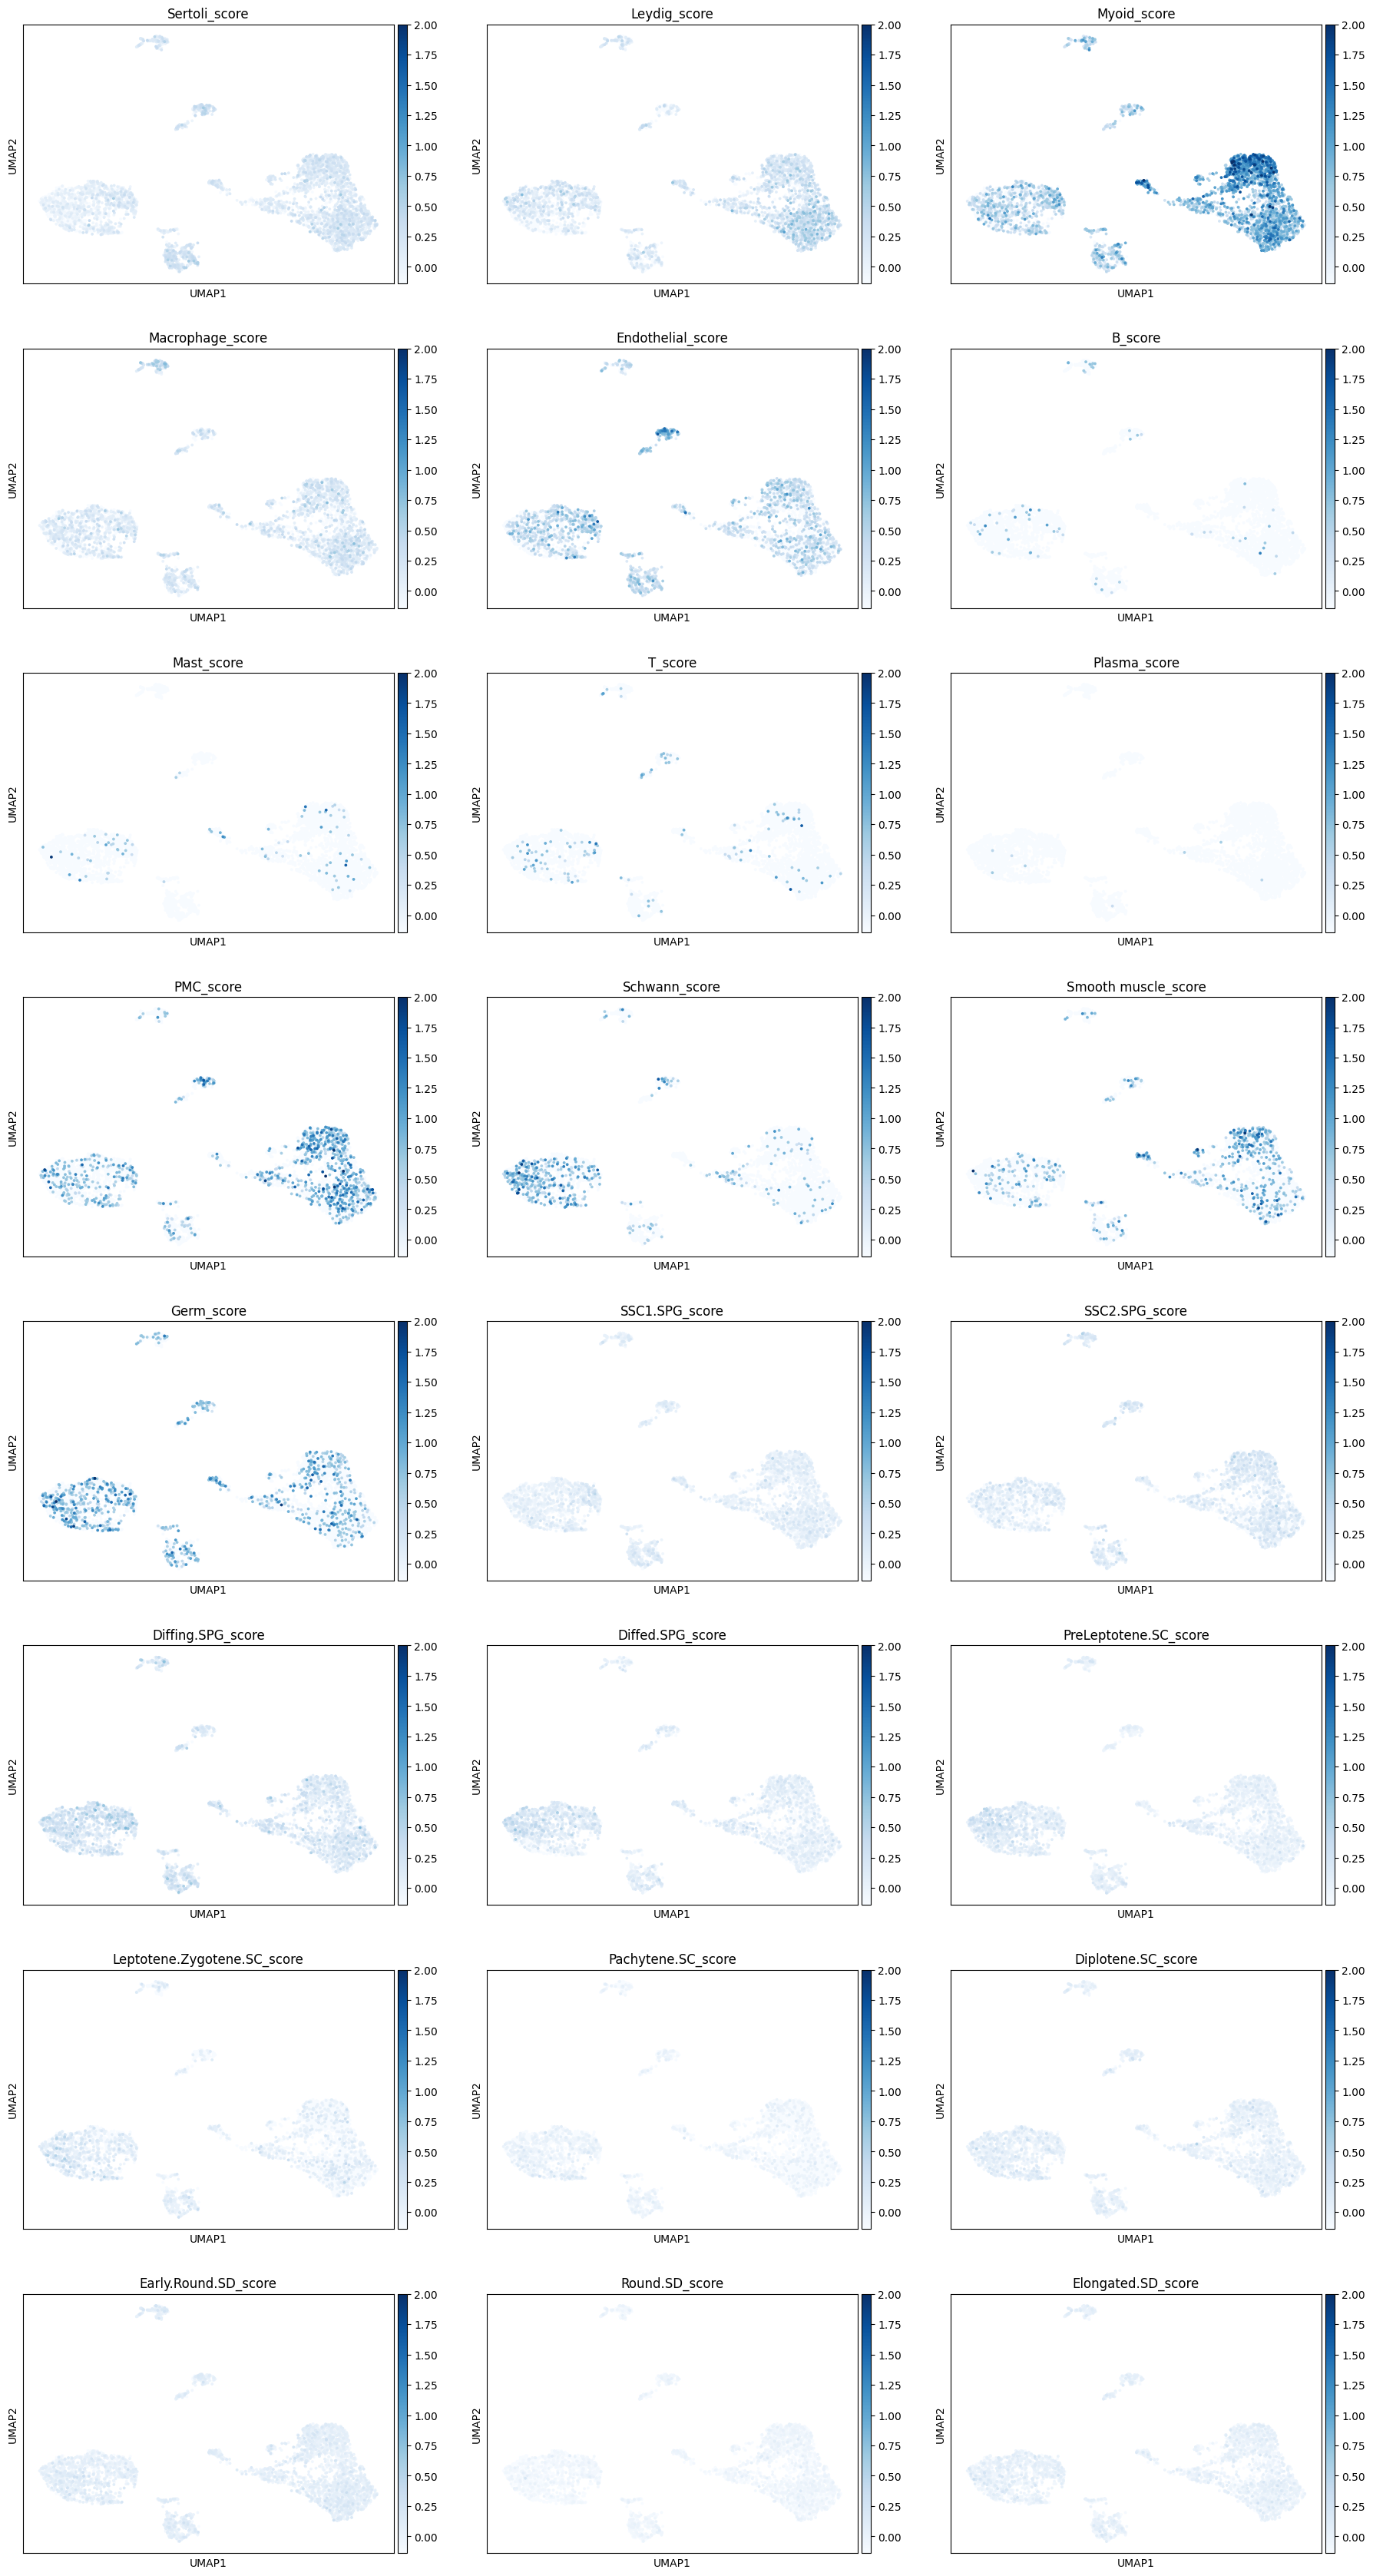

In [91]:
sc.pl.umap(atac_ga, color=marker_scores, components = ['1,2'], ncols = 3, vmax = 2, s=30, cmap = 'Blues')

In [58]:
atac_ga.write("../../results/NOA1_atac_ga.h5ad")

Combining scRNA-seq data with scATAC-seq data to annotate celltype on scATAC-seq using the predicted celltypes from scRNA-seq.

In [2]:
atac_ga = sc.read("/faststorage/project/projectsInBioinformatics/workspaces/johan/results/NOA1_atac_ga.h5ad")
rna = sc.read("/faststorage/project/projectsInBioinformatics/workspaces/johan/results/combined_rna.h5ad")

/home/jool/miniforge3/envs/torch/lib/python3.13/site-packages/anndata/_core/anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
atac_ga.obs["celltype_leiden"] = "Unknown"

In [27]:
atac_ga.X = atac_ga.layers["standard"].copy()
sc.pp.normalize_total(atac_ga, target_sum=1e4)
sc.pp.log1p(atac_ga)
sc.pp.scale(atac_ga)
sc.pp.pca(atac_ga, random_state=123)

/home/jool/miniforge3/envs/torch/lib/python3.13/functools.py:934: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


In [28]:
rna.X = rna.layers['raw_counts'].copy()
sc.pp.normalize_total(rna, target_sum=1e4)
sc.pp.log1p(rna)
sc.pp.scale(rna)
sc.pp.pca(rna, random_state=123)

/home/jool/miniforge3/envs/torch/lib/python3.13/functools.py:934: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


In [29]:
merged = sc.AnnData.concatenate(rna, atac_ga, batch_key='technology', batch_categories=['RNA','ATAC'])

/tmp/11354000/ipykernel_1434777/2009312827.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  merged = sc.AnnData.concatenate(rna, atac_ga, batch_key='technology', batch_categories=['RNA','ATAC'])
/home/jool/miniforge3/envs/torch/lib/python3.13/site-packages/anndata/_core/anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/jool/miniforge3/envs/torch/lib/python3.13/site-packages/anndata/_core/anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/jool/miniforge3/envs/torch/lib/python3.13/site-packages/anndata/_core/anndata.py:1791: UserWarning: Observation names are not unique. To make them unique, 

In [30]:
merged

AnnData object with n_obs × n_vars = 33472 × 19959
    obs: 'dataset', 'size_factor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'leiden', 'Sertoli_score', 'Leydig_score', 'Myoid_score', 'Macrophage_score', 'Endothelial_score', 'B_score', 'Mast_score', 'T_score', 'Plasma_score', 'PMC_score', 'Schwann_score', 'Smooth muscle_score', 'SSC1.SPG_score', 'SSC2.SPG_score', 'Diffing.SPG_score', 'Diffed.SPG_score', 'PreLeptotene.SC_score', 'Leptotene.Zygotene.SC_score', 'Pachytene.SC_score', 'Diplotene.SC_score', 'Early.Round.SD_score', 'Round.SD_score', 'Elongated.SD_score', 'celltype_leiden', 'NS', 'nucleosome_signal', 'technology'
    var: 'highly_variable-ATAC', 'means-ATAC', 'dispersions-ATAC', 'dispersions_norm-ATAC', 'mean-ATAC', 'std-ATAC', 'chrom-ATAC', 'start-ATAC', 'end-ATAC', 'mt-RNA', 'n_cells_by_counts-RNA', 'mean_counts-RNA', 'pct_dropout_by_counts-RNA', 'total_counts-RNA', 'n_cells-RNA', 'highly_variable-RNA', 'means-RNA', 'dispersions-RN

In [31]:
merged.var["highly_variable"] = (merged.var["highly_variable-ATAC"]) | (merged.var["highly_variable-RNA"]) 

In [32]:
#sc.pp.pca(merged, mask_var="highly_variable")

In [33]:
sc.external.pp.harmony_integrate(merged, key="technology")

2025-11-07 10:30:31,113 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-11-07 10:30:35,821 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-11-07 10:30:35,876 - harmonypy - INFO - Iteration 1 of 10
2025-11-07 10:30:39,150 - harmonypy - INFO - Iteration 2 of 10
2025-11-07 10:30:42,319 - harmonypy - INFO - Iteration 3 of 10
2025-11-07 10:30:45,465 - harmonypy - INFO - Iteration 4 of 10
2025-11-07 10:30:48,701 - harmonypy - INFO - Converged after 4 iterations


In [34]:
merged.obsm["X_pca"]= merged.obsm["X_pca_harmony"].copy()

In [35]:
bbknn.bbknn(merged, batch_key="technology", neighbors_within_batch=20)

In [36]:
sc.tl.umap(merged, random_state = 123)

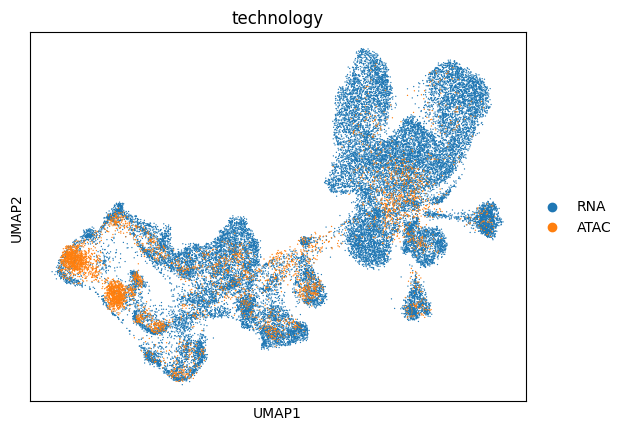

In [37]:
sc.pl.umap(merged, color=["technology"])

Manual ingest

In [38]:
from scipy import sparse
from collections import Counter

In [39]:
# Get indices for RNA and ATAC cells
rna_mask = merged.obs["technology"] == "RNA"
atac_mask = merged.obs["technology"] == "ATAC"

# Get the connectivity matrix (neighbors graph)
connectivities = merged.obsp['connectivities']

# For each ATAC cell, find its RNA neighbors and assign consensus cell type
for atac_idx in np.where(atac_mask)[0]:
    # Get neighbors of this ATAC cell
    neighbors_row = connectivities[atac_idx].toarray().flatten()
    neighbor_indices = np.where(neighbors_row > 0)[0]
    
    # Filter to only RNA neighbors
    rna_neighbor_indices = neighbor_indices[rna_mask[neighbor_indices]]
    
    if len(rna_neighbor_indices) > 0:
        # Get cell types of RNA neighbors
        rna_neighbor_celltypes = merged.obs.iloc[rna_neighbor_indices]["celltype_leiden"].values
        
        # Find most common cell type (consensus)
        consensus_celltype = Counter(rna_neighbor_celltypes).most_common(1)[0][0]
        
        # Assign to ATAC cell
        merged.obs.loc[merged.obs.index[atac_idx], "celltype_leiden"] = consensus_celltype

/tmp/11354000/ipykernel_1434777/260327813.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rna_neighbor_indices = neighbor_indices[rna_mask[neighbor_indices]]
/tmp/11354000/ipykernel_1434777/260327813.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rna_neighbor_indices = neighbor_indices[rna_mask[neighbor_indices]]
/tmp/11354000/ipykernel_1434777/260327813.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rna_neighbor_in

Some cells still unknown - distance too big from RNA cells - doing a second pass using also renamed cells from ATAC

In [40]:
# Find ATAC cells still labeled as "Unknown"
unknown_atac_indices = merged.obs[
    (merged.obs["technology"] == "ATAC") & (merged.obs["celltype_leiden"] == "Unknown")
].index

for idx in unknown_atac_indices:
    row_idx = merged.obs.index.get_loc(idx)
    neighbors_row = connectivities[row_idx].toarray().flatten()
    neighbor_indices = np.where(neighbors_row > 0)[0]
    if len(neighbor_indices) > 0:
        neighbor_celltypes = merged.obs.iloc[neighbor_indices]["celltype_leiden"]
        # Exclude "Unknown" from consensus
        neighbor_celltypes = neighbor_celltypes[neighbor_celltypes != "Unknown"]
        if len(neighbor_celltypes) > 0:
            consensus = Counter(neighbor_celltypes).most_common(1)[0][0]
            merged.obs.at[idx, "celltype_leiden"] = consensus

In [43]:
unknows_present = True
while unknows_present:
    
    # Find ATAC cells still labeled as "Unknown"
    unknown_atac_indices = merged.obs[
        (merged.obs["technology"] == "ATAC") & (merged.obs["celltype_leiden"] == "Unknown")
    ].index
    
    for idx in unknown_atac_indices:
        row_idx = merged.obs.index.get_loc(idx)
        neighbors_row = connectivities[row_idx].toarray().flatten()
        neighbor_indices = np.where(neighbors_row > 0)[0]
        if len(neighbor_indices) > 0:
            neighbor_celltypes = merged.obs.iloc[neighbor_indices]["celltype_leiden"]
            # Exclude "Unknown" from consensus
            neighbor_celltypes = neighbor_celltypes[neighbor_celltypes != "Unknown"]
            if len(neighbor_celltypes) > 0:
                consensus = Counter(neighbor_celltypes).most_common(1)[0][0]
                merged.obs.at[idx, "celltype_leiden"] = consensus
    if len(merged.obs[(merged.obs["technology"] == "ATAC") & (merged.obs["celltype_leiden"] == "Unknown")].index) > 0:
        unknows_present = True
    else: 
        unknows_present = False

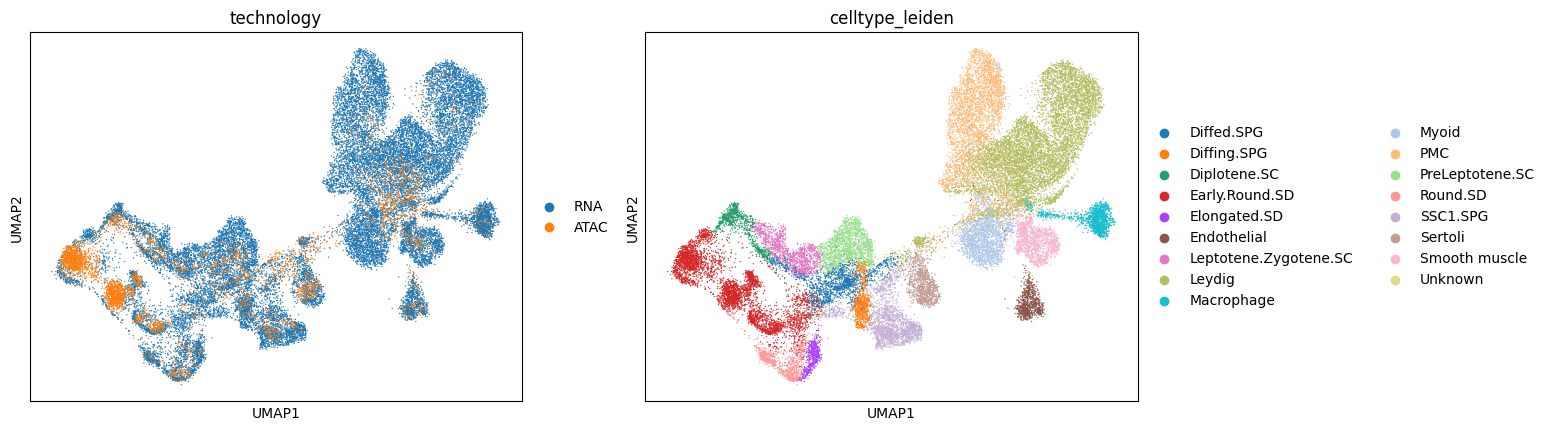

In [44]:
sc.pl.umap(merged, color=["technology","celltype_leiden"], ncols=2)

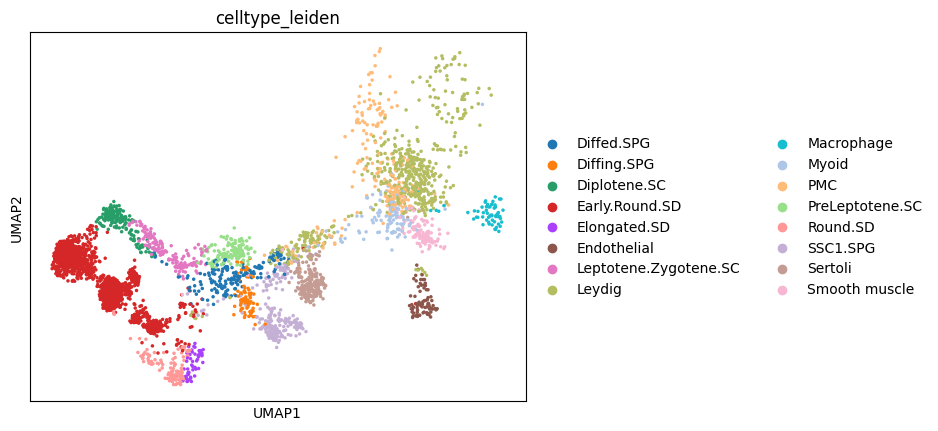

In [45]:
sc.pl.umap(merged[merged.obs["technology"] == "ATAC"], color=["celltype_leiden"])

In [50]:
rna_sub = merged[merged.obs.technology == "RNA"].copy()
atac_ga_sub = merged[merged.obs.technology == "ATAC"].copy()

#use only genes present in both datasets
sc.pp.subsample(rna_sub, n_obs=atac_ga_sub.shape[0], random_state=123)

var_names = rna_sub.var_names.intersection(atac_ga_sub.var_names)
rna_sub = rna_sub[:, var_names]
atac_ga_sub = atac_ga_sub[:, var_names]

sc.pp.neighbors(rna_sub, n_neighbors=20)
sc.pp.neighbors(atac_ga_sub, n_neighbors=20)

sc.tl.ingest(atac_ga_sub, rna_sub, obs=['celltype_leiden'], embedding_method="pca")




KeyError: 'umap'

# PeakVI

In [ ]:
scvi.settings.seed = 0
torch.set_float32_matmul_precision("high")
atac.X = atac.layers["raw_counts"]

In [ ]:
atac

In [ ]:
scvi.model.PEAKVI.setup_anndata(atac)

In [ ]:
model = scvi.model.PEAKVI(atac)

In [ ]:
model.train()

In [ ]:
model_dir = "/faststorage/project/projectsInBioinformatics/workspaces/johan/PIB-johan-olesen/Notebooks/atac_models"

In [ ]:
model.save(model_dir, overwrite=True)

In [ ]:
model = scvi.model.PEAKVI.load(model_dir, adata = atac)

In [ ]:
PEAKVI_LATENT_KEY = "X_peakvi"

latent = model.get_latent_representation()
atac.obsm[PEAKVI_LATENT_KEY] = latent
latent.shape

In [ ]:
PEAKVI_CLUSTERS_KEY = "clusters_peakvi"

# compute the k-nearest-neighbor graph that is used in both clustering and umap algorithms
sc.pp.neighbors(atac, use_rep=PEAKVI_LATENT_KEY)
# compute the umap
sc.tl.umap(atac, min_dist=0.2)
# cluster the space (we use a lower resolution to get fewer clusters than the default)
sc.tl.leiden(atac, key_added=PEAKVI_CLUSTERS_KEY, resolution=0.5)

In [ ]:
sc.pl.umap(atac, color = PEAKVI_CLUSTERS_KEY)

In [ ]:
clusters = atac.obs[PEAKVI_CLUSTERS_KEY].unique()
clusters

In [ ]:
all_results = []

for cluster in clusters:
    # indices for current
    idx1 = np.where(atac.obs[PEAKVI_CLUSTERS_KEY] == cluster)[0]
    
    # DA vs. all other
    da_res = model.differential_accessibility(idx1=idx1, idx2=None)
    
    df = pd.DataFrame(da_res)
    df["cluster"] = cluster  # annotate current cluster
    all_results.append(df)

da_df = pd.concat(all_results, ignore_index=True)

In [ ]:
da_df.head()